ML Project

Steps:
1. Get the Data, currently attempting redfin as zillow does not have granularity needed
   - Redfin did not have data at granularity either
   - Using https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset for now
3. Explore the Data
4. Clean/Pre Process the Data if needed

5. Attempt Linear regression

Loading Libaries and Creating function to load dataset

In [1]:
import pandas as pd
import os

HOUSING_PATH = "Data"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "realtor-data.zip.csv")
    return pd.read_csv(csv_path)


Loading Dataset by calling function and peaking at data

In [2]:
housing = load_housing_data()
housing.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


Exploring Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


Null Counts:
<br>Bed and Bath (Maybe this is for land sales)
<br>Acre_lot (???)
<br>house size (Just for land sales?)
<br>Prev_sold_date (First time sold?, new contructions)

In [4]:
housing.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,775126.000000,791082.000000,638324.000000,904762.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,17.317292,6519.464582,2.138437e+03,8.774382e+05
std,2.065312,1.931622,970.707378,3816.713093,3.046600e+03,2.457698e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.110000,2908.000000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,0.290000,6811.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,1.150000,8854.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


Zip Code - Dimensional Data, therefore mean, std, etc doesn't make sense
<br>Bed & Bath - Max values seem strange




# Plotting the data

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

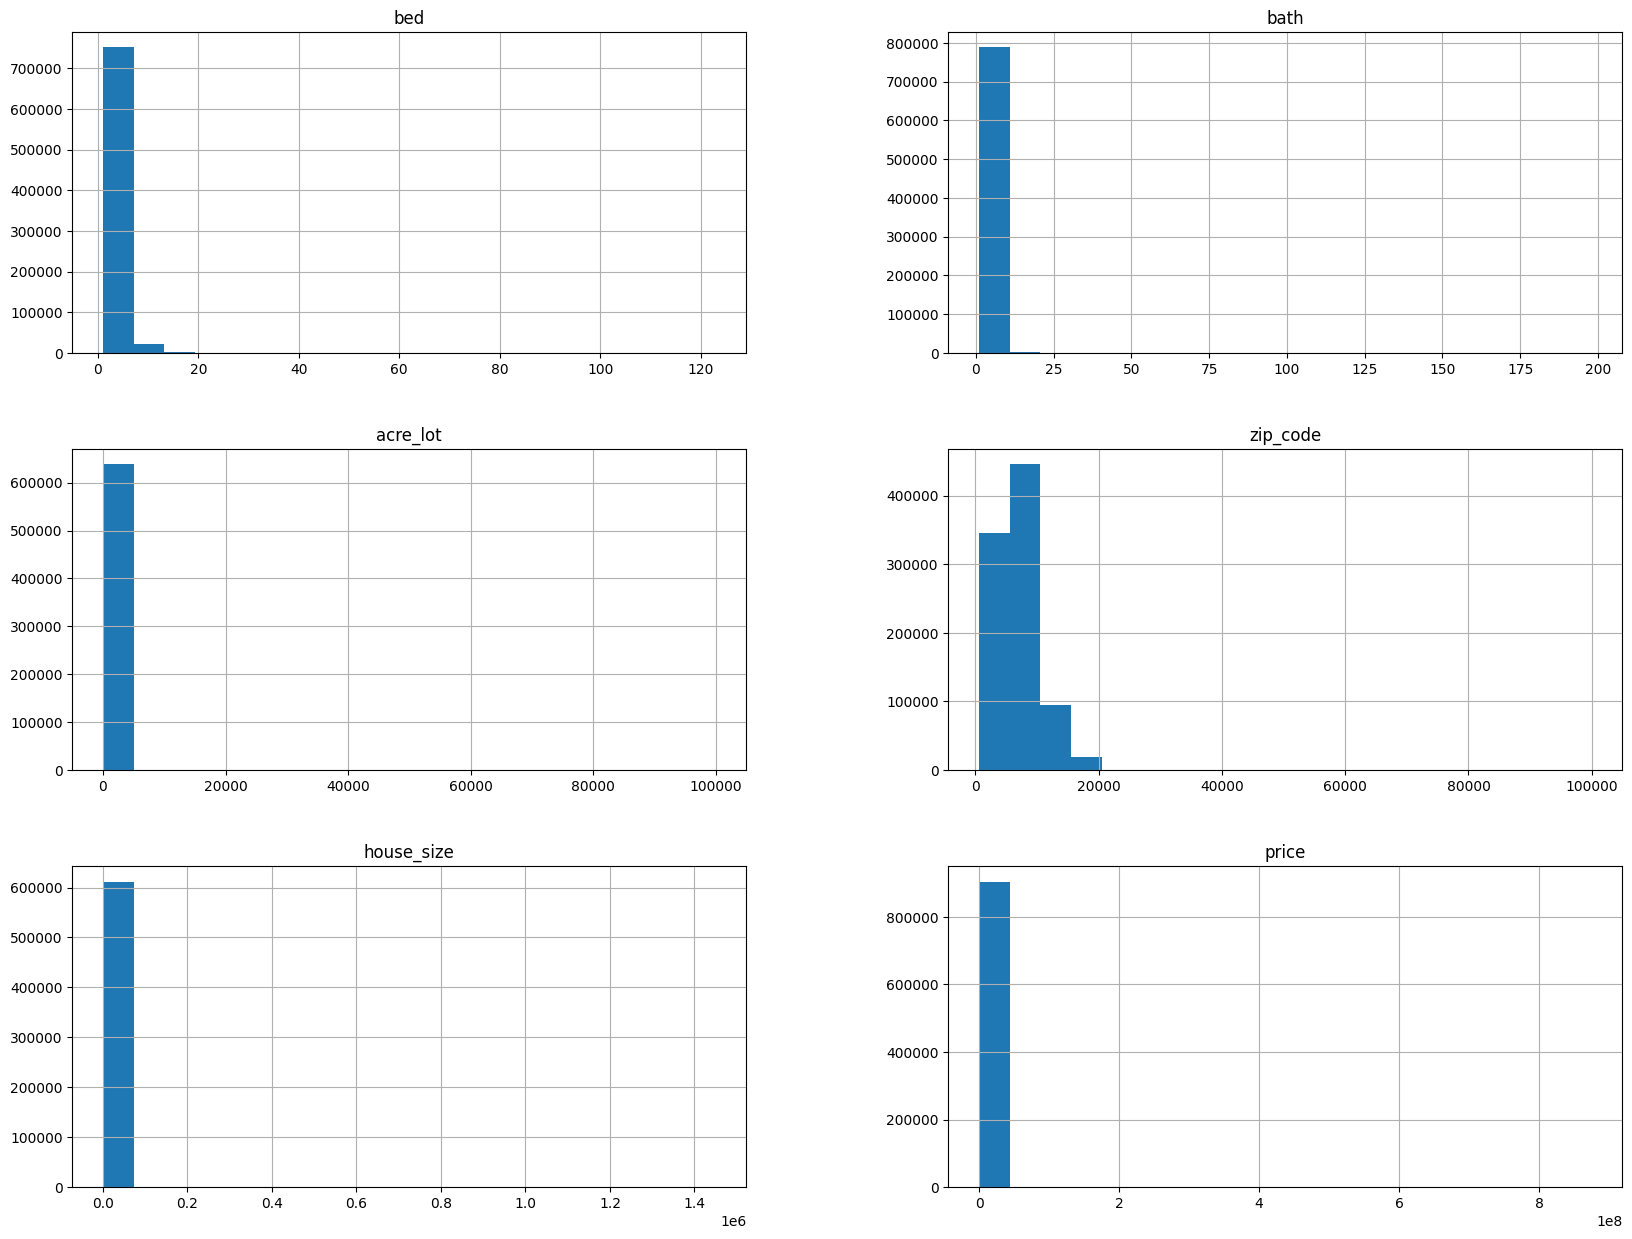

In [61]:

housing.hist(bins=20, figsize=(20,15))
plt.show()

In [6]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(housing, 0.2)

In [8]:
housing = train_set.copy()
attributes =["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]
corr_matrix = housing[attributes].corr()
corr_matrix

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,0.721396,-0.003769,-0.082345,0.366646,0.152369
bath,0.721396,1.000000,-0.000751,-0.052806,0.356937,0.259432
acre_lot,-0.003769,-0.000751,1.000000,0.002793,0.053897,0.003570
zip_code,-0.082345,-0.052806,0.002793,1.000000,-0.041301,0.067608
house_size,0.366646,0.356937,0.053897,-0.041301,1.000000,0.154991
price,0.152369,0.259432,0.003570,0.067608,0.154991,1.000000


In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(12, 8))

array([[<Axes: xlabel='bed', ylabel='bed'>,
        <Axes: xlabel='bath', ylabel='bed'>,
        <Axes: xlabel='acre_lot', ylabel='bed'>,
        <Axes: xlabel='zip_code', ylabel='bed'>,
        <Axes: xlabel='house_size', ylabel='bed'>,
        <Axes: xlabel='price', ylabel='bed'>],
       [<Axes: xlabel='bed', ylabel='bath'>,
        <Axes: xlabel='bath', ylabel='bath'>,
        <Axes: xlabel='acre_lot', ylabel='bath'>,
        <Axes: xlabel='zip_code', ylabel='bath'>,
        <Axes: xlabel='house_size', ylabel='bath'>,
        <Axes: xlabel='price', ylabel='bath'>],
       [<Axes: xlabel='bed', ylabel='acre_lot'>,
        <Axes: xlabel='bath', ylabel='acre_lot'>,
        <Axes: xlabel='acre_lot', ylabel='acre_lot'>,
        <Axes: xlabel='zip_code', ylabel='acre_lot'>,
        <Axes: xlabel='house_size', ylabel='acre_lot'>,
        <Axes: xlabel='price', ylabel='acre_lot'>],
       [<Axes: xlabel='bed', ylabel='zip_code'>,
        <Axes: xlabel='bath', ylabel='zip_code'>,
        <A

Error in callback <function _draw_all_if_interactive at 0x0000025BB217B9C0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000025BB21ACE00> (for post_execute):


KeyboardInterrupt: 

Deal with Nulls:
<br>Bed and Bath: Drop for now (Come back and use house size to determine if a house was sold?)


In [9]:
def prepare_data(data):
    data = data.dropna(subset=['bed','bath'])
    data = data[data["acre_lot"] <20000]
    data = data.dropna(subset=["house_size"])
    data = data.drop("status",axis=1)
    data = data.drop("city",axis=1)
    data = data.drop("state",axis=1)
    data = data.drop("prev_sold_date",axis=1)
    data = data.drop("zip_code",axis=1)
    
    
    return data
    

Acre_lot (???)


NameError: name 'plt' is not defined

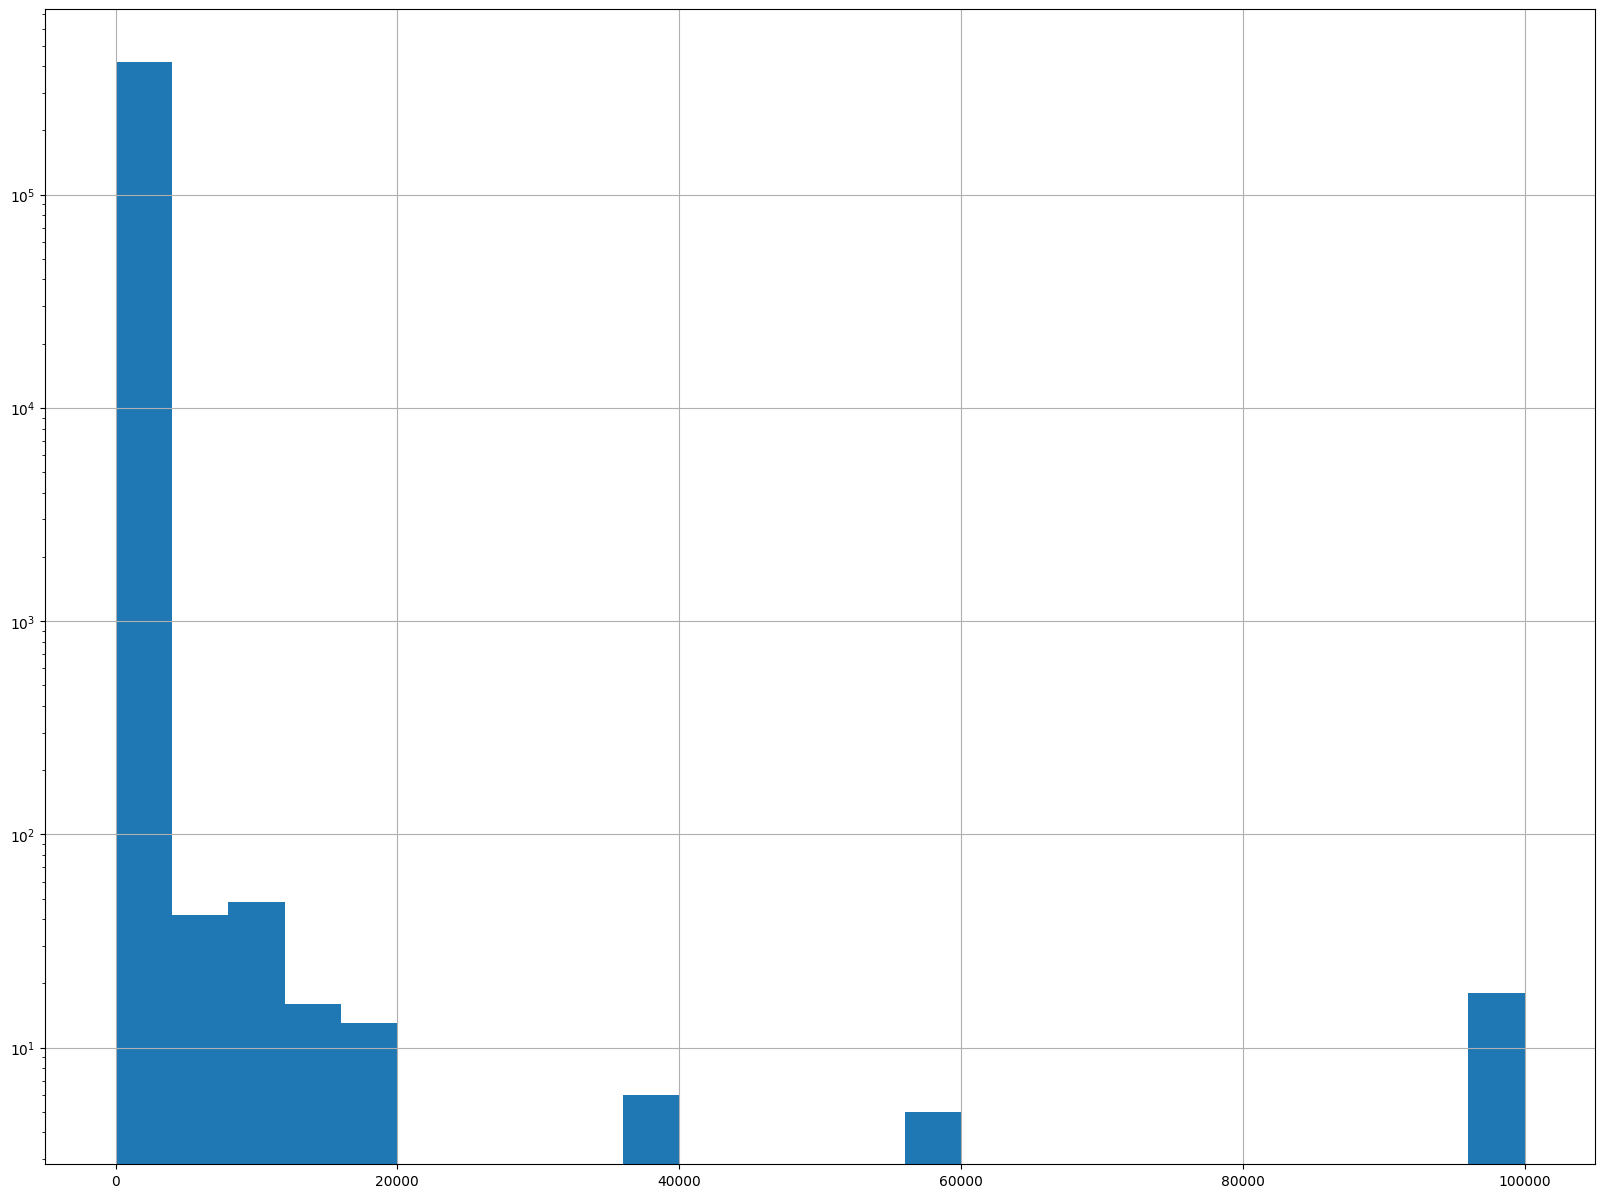

In [26]:
housing_c1['acre_lot'].hist(bins=25, figsize=(20,15),log=True)
plt.show()

Going to remove all values ~20000 acre size

<br>house size: Going to drop records without house size


In [119]:
housing_c3 = housing_c2.dropna(subset=["house_size"])
housing_c4 = housing_c3.drop("status",axis=1)
housing_c5 = housing_c4.drop("city",axis=1)
housing_c6 = housing_c5.drop("state",axis=1)
housing_c7 = housing_c6.drop("prev_sold_date",axis=1)
housing_c8 = housing_c7.dropna(subset="zip_code")
x = housing_c8.drop("price",axis=1)
nan_count = x.isna().sum()

y = housing_c8["price"]
nan_count

bed           0
bath          0
acre_lot      0
zip_code      0
house_size    0
dtype: int64

In [10]:
housing

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
627358,for_sale,3.0,3.0,NaN,Bridgewater Twp,New Jersey,8807.0,NaN,2013-07-11,545000.0
536908,for_sale,3.0,2.0,0.07,Ridgefield Park,New Jersey,7660.0,NaN,2007-02-13,490000.0
754002,for_sale,4.0,3.0,0.06,North Bergen,New Jersey,7047.0,NaN,2001-06-11,799000.0
585889,for_sale,2.0,1.0,0.12,Keansburg,New Jersey,7734.0,NaN,2019-08-30,240000.0
775202,for_sale,2.0,2.0,NaN,Hoboken,New Jersey,7030.0,1155.0,2016-08-11,999900.0
...,...,...,...,...,...,...,...,...,...,...
5464,for_sale,4.0,2.0,0.09,San Juan,Puerto Rico,926.0,1000.0,NaN,145000.0
150375,for_sale,3.0,1.0,0.08,Boston,Massachusetts,2128.0,681.0,NaN,425000.0
149877,for_sale,6.0,4.0,0.49,Randolph,Massachusetts,2368.0,4038.0,2003-09-19,1100000.0
279194,for_sale,4.0,3.0,1.22,Hampstead,New Hampshire,3841.0,2620.0,NaN,850000.0


In [11]:
prepared_data = prepare_data(housing)
prepared_data

,bed,bath,acre_lot,house_size,price
413459,3.0,2.0,1.35,1992.0,349900.0
45633,5.0,4.0,3.40,3927.0,1350000.0
412765,4.0,3.0,1.38,3460.0,699000.0
422839,3.0,1.0,0.69,1008.0,169900.0
211173,3.0,1.0,0.08,1008.0,249900.0
...,...,...,...,...,...
58267,9.0,9.0,1.00,5358.0,839000.0
5464,4.0,2.0,0.09,1000.0,145000.0
150375,3.0,1.0,0.08,681.0,425000.0
149877,6.0,4.0,0.49,4038.0,1100000.0


In [12]:

prepared_train_x = prepared_data.drop("price",axis=1)
prepared_train_y = prepared_data["price"]

xnan_count = prepared_train_x.isna().sum()
xnan_count

bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [13]:
prepared_train_y

413459     349900.0
45633     1350000.0
412765     699000.0
422839     169900.0
211173     249900.0
            ...    
58267      839000.0
5464       145000.0
150375     425000.0
149877    1100000.0
279194     850000.0
Name: price, Length: 330971, dtype: float64

In [14]:
ynan_count = prepared_train_y.isna().sum()
ynan_count

0

<br>Prev_sold_date (Time series? For now I'll drop but, I may add back in as boolean)

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_train_x,prepared_train_y)

LinearRegression()

In [17]:
housing_test = test_set.copy()
prepared_test_data = prepare_data(housing_test)
prepared_test_data


,bed,bath,acre_lot,house_size,price
748557,2.0,2.0,0.05,957.0,623000.0
87863,5.0,2.0,0.34,2430.0,335000.0
200454,4.0,2.0,0.06,1488.0,425000.0
819860,5.0,2.0,0.08,2625.0,849000.0
324937,3.0,1.0,3.09,1868.0,249900.0
...,...,...,...,...,...
397899,3.0,1.0,0.25,1672.0,184900.0
102107,7.0,3.0,0.11,4141.0,425000.0
27768,5.0,5.0,0.07,3303.0,159900.0
318503,4.0,1.0,0.06,1523.0,595000.0


In [18]:
prepared_test_x = prepared_test_data.drop("price",axis=1)
prepared_test_y = prepared_test_data["price"]

In [19]:
predictions = lin_reg.predict(prepared_test_x)
predictions



array([ 563236.1771033 ,  573215.96981952,  541327.04334993, ...,
       1358057.85528528,  300347.64951337,  568178.47154433])

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(prepared_test_y, predictions)
print('mean_squared_error : ', mean_squared_error(prepared_test_y, predictions, squared = False))
print('mean_absolute_error : ', mae)
mean_target = prepared_test_y.mean()
mae_percentage = (mae / mean_target) * 100
print('mean_absolute_error as a percentage: {:.2f}%'.format(mae_percentage))

mean_squared_error :  1408465.5709737993
mean_absolute_error :  461302.49706669786
mean_absolute_error as a percentage: 59.41%


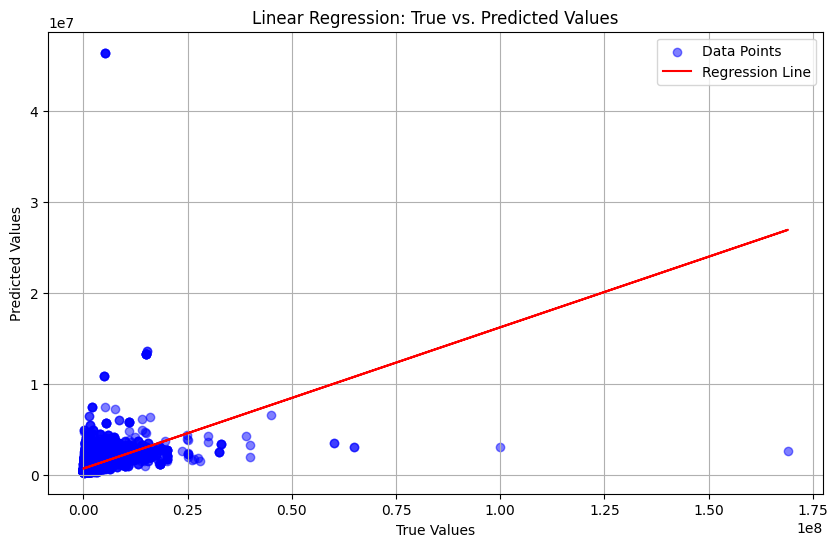

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of true values vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(prepared_test_y, predictions, c='blue', alpha=0.5, label='Data Points')
plt.title('Linear Regression: True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Add a regression line
regression_line = np.polyfit(prepared_test_y, predictions, 1)
plt.plot(prepared_test_y, np.polyval(regression_line, prepared_test_y), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()